In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bank.csv',sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
data.shape

(4521, 17)

In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


Data is Imbalanced so we need to change the data

In [8]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
x = data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]
y = data['y']

In [11]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
df1,df2 = ros.fit_resample(x,y)

In [12]:
df1.shape

(8000, 16)

In [13]:
res = pd.concat([df1, df2], axis=1, join='inner')
display(res)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,39,services,divorced,secondary,no,687,yes,no,cellular,9,jul,869,1,-1,0,unknown,yes
7996,62,retired,divorced,tertiary,no,0,no,no,cellular,13,nov,227,2,-1,0,unknown,yes
7997,61,management,married,secondary,no,985,no,no,cellular,18,aug,998,6,-1,0,unknown,yes
7998,28,admin.,single,secondary,no,4745,no,no,telephone,12,may,360,1,181,5,success,yes


In [14]:
res.shape

(8000, 17)

Now The data is Balanced

<AxesSubplot:>

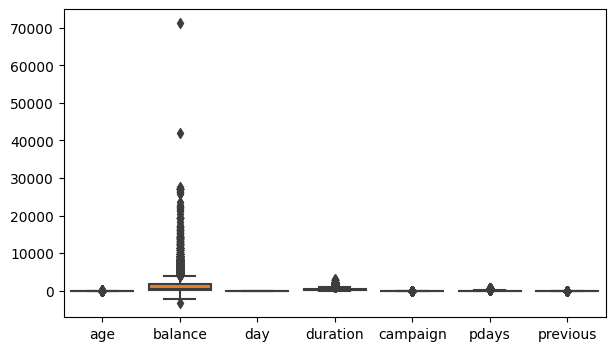

In [15]:
plt.figure(figsize = (7,4))
sns.boxplot(data=res)

<AxesSubplot:>

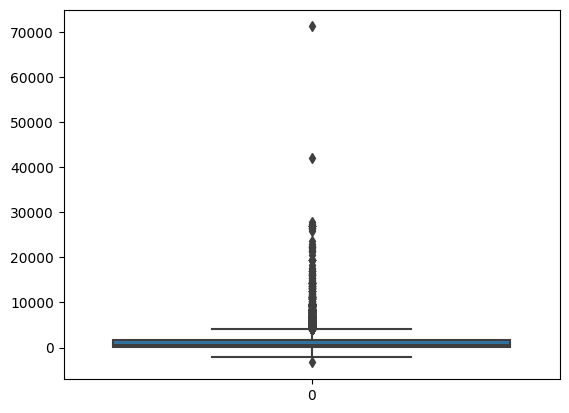

In [16]:
sns.boxplot(data=res.balance)

There are so many outliers in balance column so we have to remove them

In [17]:
Q1 = res['balance'].quantile(0.25)
Q3 = res['balance'].quantile(0.75)

IQR = Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit, upper_limit)

-2277.25 4072.75


In [18]:
res.balance[(res['balance']<lower_limit) | (res['balance']>upper_limit)] = np.nan

In [19]:
res.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance      785
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [20]:
res.dropna(inplace=True)

In [21]:
res.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Now Outliers are removed

The Dataset is containing so much columns so we have to remove it from the dataset

This Dataset is containing too many categorical columns so we will convert it to integer with LabelEncoder

In [22]:
data1 = res.copy()
data1.shape

(7215, 17)

Some Columns data type is need to change before performing label encoding

In [23]:
label_encoders = {}
categorical_columns = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data1[column] = label_encoders[column].fit_transform(data1[column])  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787.0,0,0,0,19,10,79,1,-1,0,3,0
2,35,4,2,2,0,1350.0,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476.0,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0.0,1,0,2,5,8,226,1,-1,0,3,0
5,35,4,2,2,0,747.0,0,0,0,23,3,141,2,176,3,0,0


<AxesSubplot:>

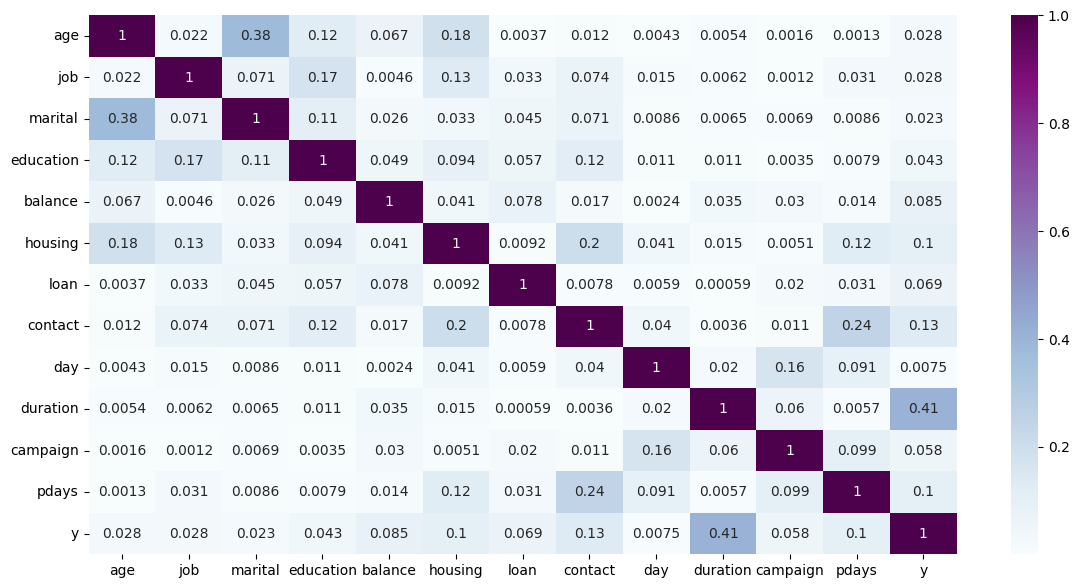

In [39]:
plt.figure(figsize = (14,7))
sns.heatmap(data1.corr().abs(),annot=True,cmap = "BuPu")

<AxesSubplot:xlabel='default', ylabel='count'>

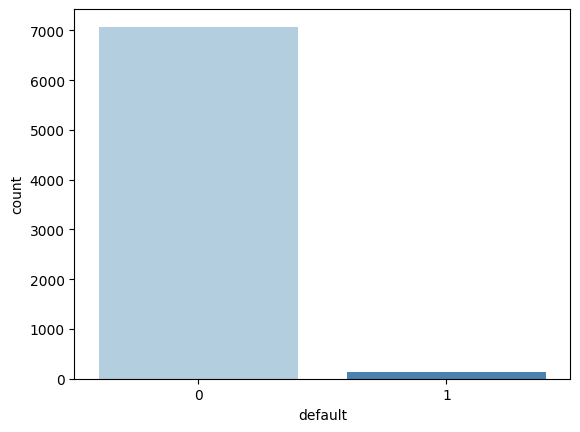

In [26]:
#Check the counplot of default column
sns.countplot(data1['default'],palette="Blues")

As we are seeing counplot is so imbalanced so we will drop it

Data Contains so many duplicate rows so we have to remove it

In [27]:
data1.drop_duplicates(inplace=True)

In [28]:
data1.drop(['default','poutcome','previous','month'],inplace = True,axis=1)

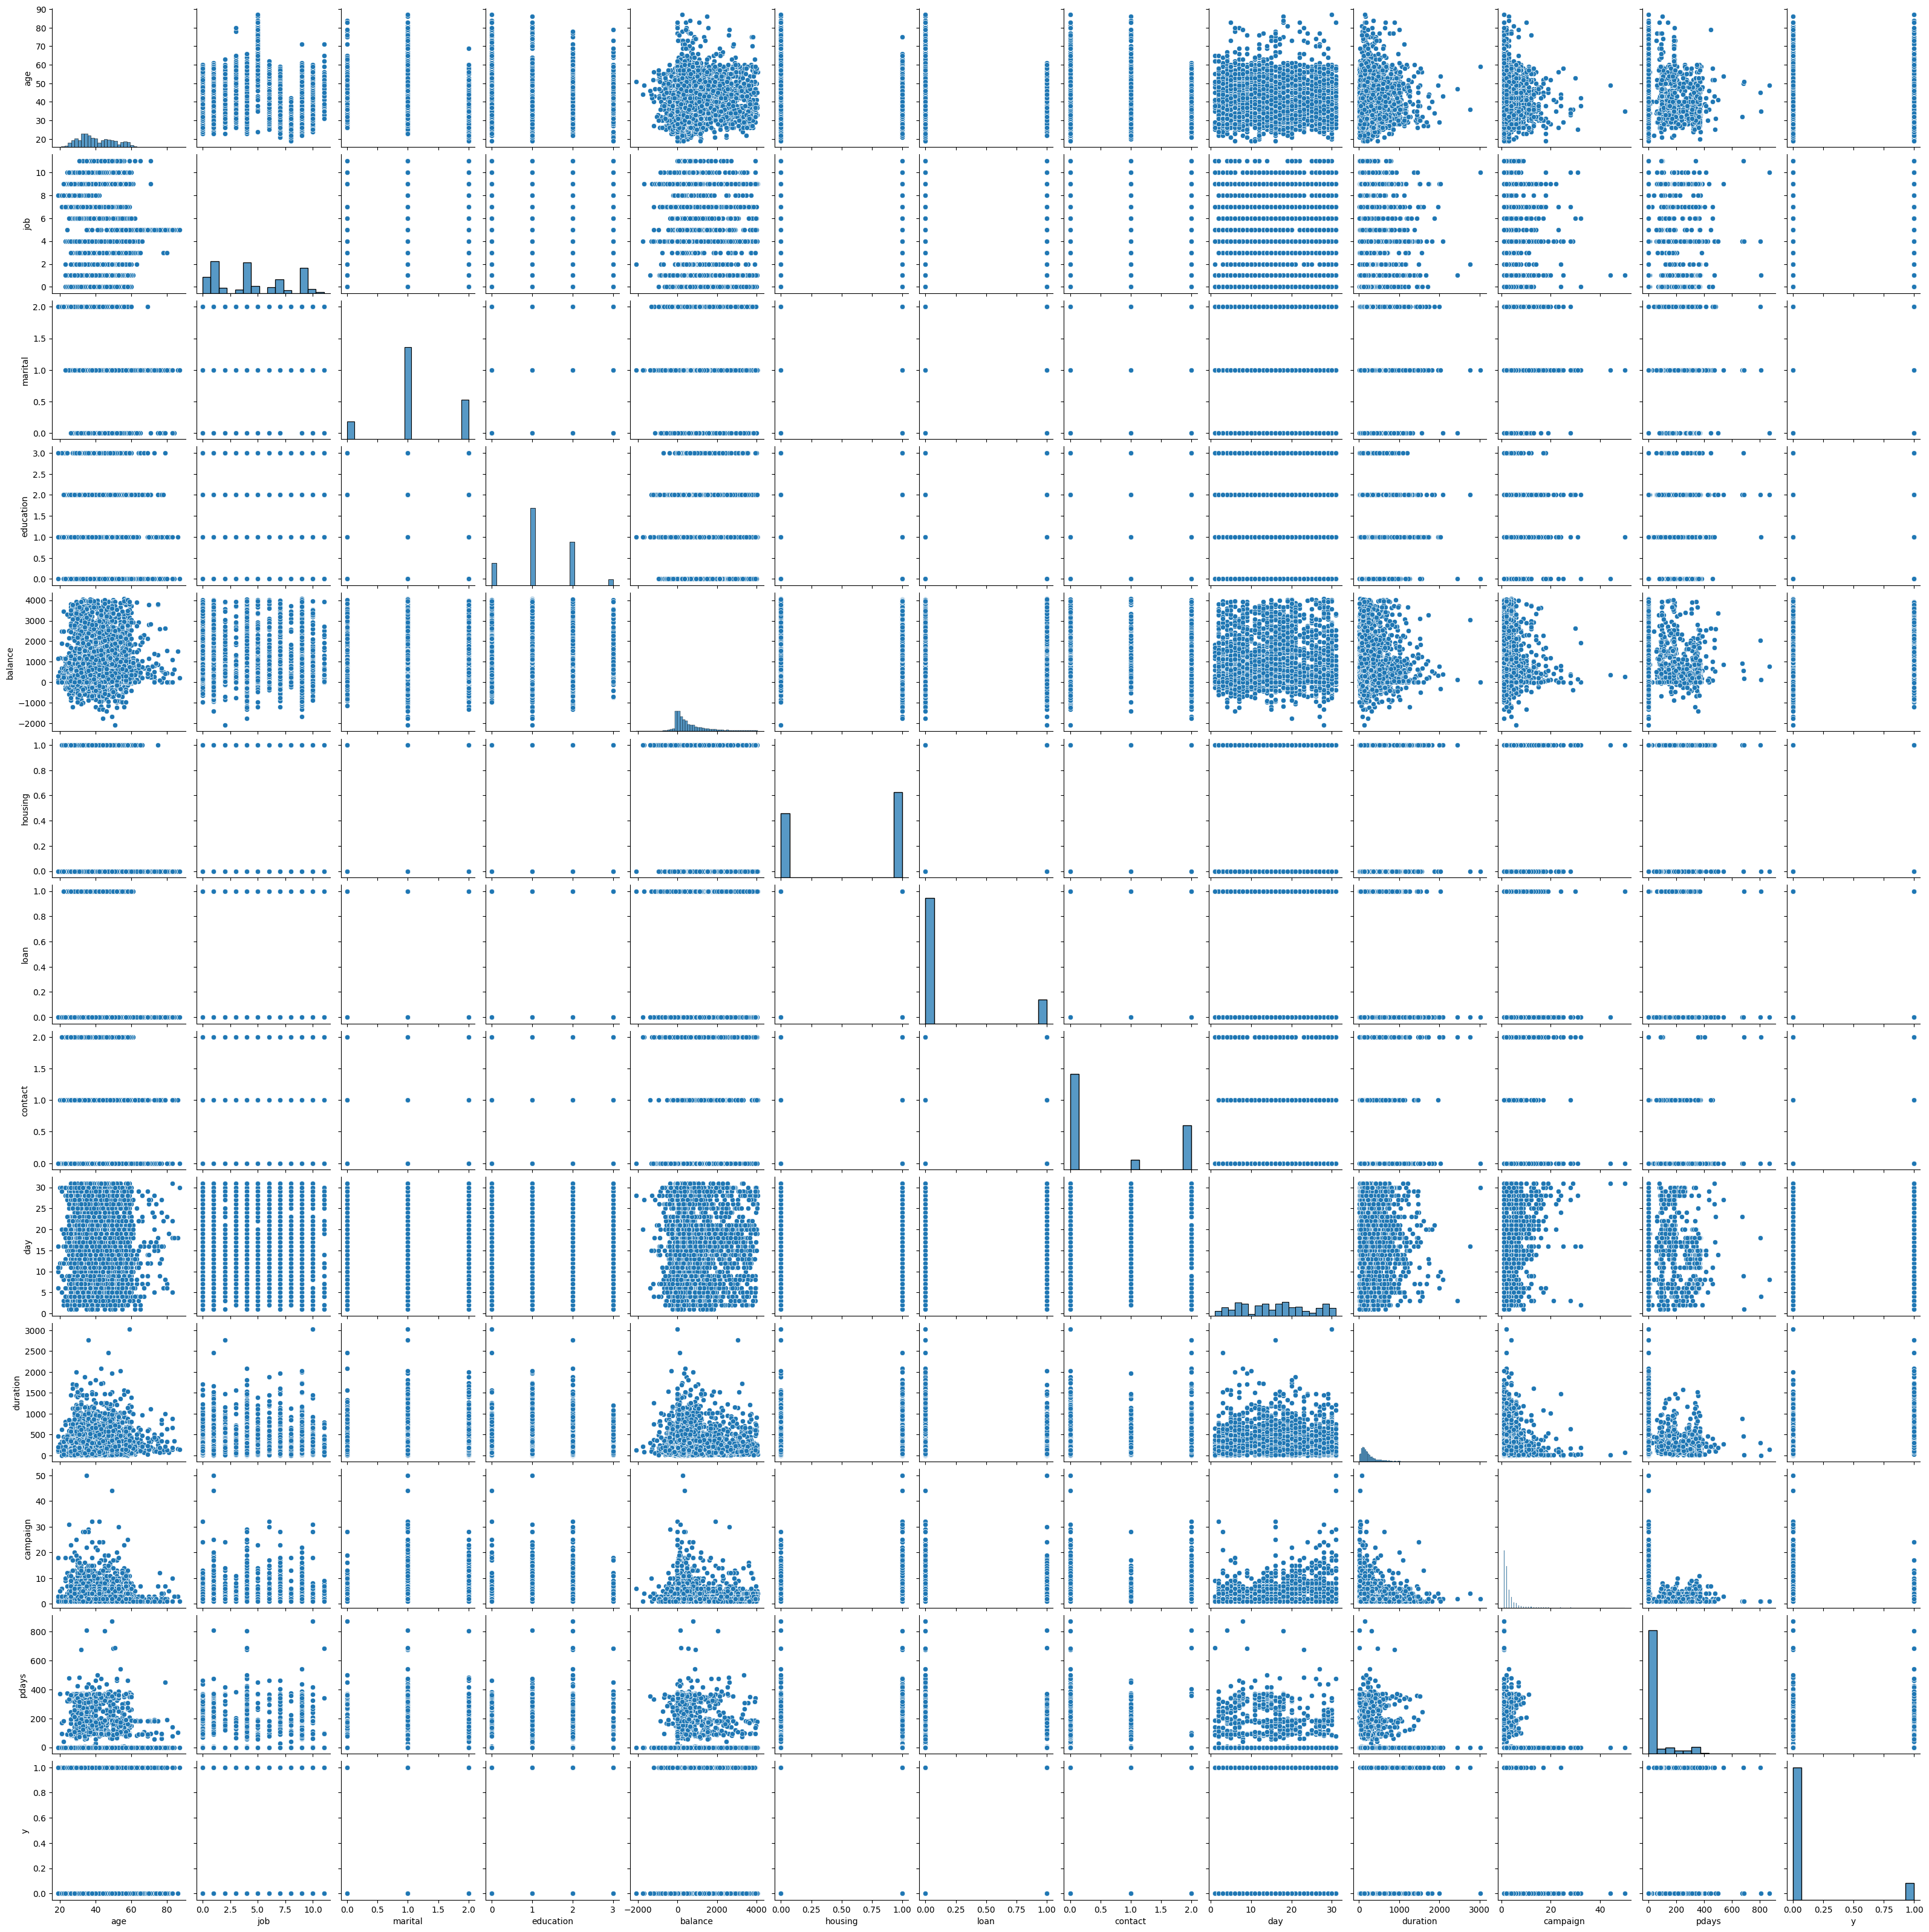

In [29]:
sns.pairplot(data1)

In [30]:
data1.tail(3)

,age,job,marital,education,balance,housing,loan,contact,day,duration,campaign,pdays,y
4518,57,9,1,1,295.0,0,0,0,19,151,11,-1,0
4519,28,1,1,1,1137.0,0,0,0,6,129,4,211,0
4520,44,2,2,2,1136.0,1,1,0,3,345,2,249,0


In [31]:
x = data1.drop(['y','day'],axis=1)
y = data1['y'].values

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,criterion='gini',random_state = 42)
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score = accuracy_score(ytest,y_pred)
print("Accuracy is :",round(score*100))

Accuracy is : 89


[[880  31]
 [ 82  32]]


<AxesSubplot:>

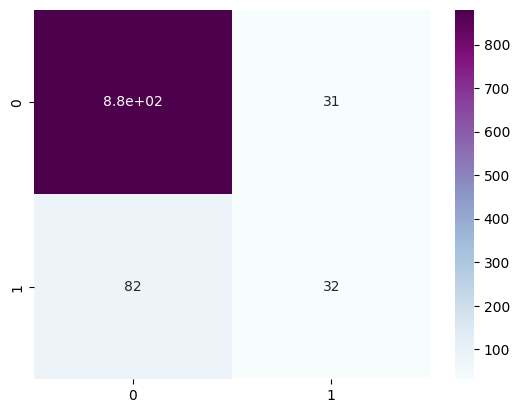

In [35]:
mtx = confusion_matrix(ytest,y_pred)
print(mtx)
sns.heatmap(mtx,annot=True,cmap="BuPu")

In [36]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       911
           1       0.51      0.28      0.36       114

    accuracy                           0.89      1025
   macro avg       0.71      0.62      0.65      1025
weighted avg       0.87      0.89      0.88      1025



In [37]:
df_preds = pd.DataFrame({'Actual': ytest.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds.head(8)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1


In [38]:
#make prediction
model.predict([[30,10,1,0,1787.0,0,0,0,79,1,-1]])

array([0])